In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GRU, LSTM, CuDNNGRU, CuDNNLSTM
from keras.callbacks import ModelCheckpoint

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/20newsbydate/20news-bydate-test/rec.sport.baseball/104745
/kaggle/input/20newsbydate/20news-bydate-test/rec.sport.baseball/104871
/kaggle/input/20newsbydate/20news-bydate-test/rec.sport.baseball/105053
/kaggle/input/20newsbydate/20news-bydate-test/rec.sport.baseball/105164
/kaggle/input/20newsbydate/20news-bydate-test/rec.sport.baseball/105023
/kaggle/input/20newsbydate/20news-bydate-test/rec.sport.baseball/104766
/kaggle/input/20newsbydate/20news-bydate-test/rec.sport.baseball/104759
/kaggle/input/20newsbydate/20news-bydate-test/rec.sport.baseball/105153
/kaggle/input/20newsbydate/20news-bydate-test/rec.sport.baseball/104811
/kaggle/input/20newsbydate/20news-bydate-test/rec.sport.baseball/105056
/kaggle/input/20newsbydate/20news-bydate-test/rec.sport.baseball/104934
/kaggle/input/20newsbydate/20news-bydate-test/rec.sport.baseball/104853
/kaggle/input/20newsbydate/20news-bydate-test/rec.sport.baseball/105163
/kaggle/input/20newsbydate/20news-bydate-test/rec.sport.baseball

/kaggle/input/20newsbydate/20news-bydate-test/rec.sport.hockey/54294
/kaggle/input/20newsbydate/20news-bydate-test/rec.sport.hockey/54229
/kaggle/input/20newsbydate/20news-bydate-test/rec.sport.hockey/54032
/kaggle/input/20newsbydate/20news-bydate-test/rec.sport.hockey/53943
/kaggle/input/20newsbydate/20news-bydate-test/rec.sport.hockey/54078
/kaggle/input/20newsbydate/20news-bydate-test/rec.sport.hockey/54545
/kaggle/input/20newsbydate/20news-bydate-test/rec.sport.hockey/54730
/kaggle/input/20newsbydate/20news-bydate-test/rec.sport.hockey/54531
/kaggle/input/20newsbydate/20news-bydate-test/rec.sport.hockey/53934
/kaggle/input/20newsbydate/20news-bydate-test/rec.sport.hockey/54745
/kaggle/input/20newsbydate/20news-bydate-test/rec.sport.hockey/54063
/kaggle/input/20newsbydate/20news-bydate-test/rec.sport.hockey/54521
/kaggle/input/20newsbydate/20news-bydate-test/rec.sport.hockey/53938
/kaggle/input/20newsbydate/20news-bydate-test/rec.sport.hockey/54727
/kaggle/input/20newsbydate/20news-

/kaggle/input/20newsbydate/20news-bydate-test/soc.religion.christian/21542
/kaggle/input/20newsbydate/20news-bydate-test/soc.religion.christian/21523
/kaggle/input/20newsbydate/20news-bydate-test/soc.religion.christian/21675
/kaggle/input/20newsbydate/20news-bydate-test/soc.religion.christian/21764
/kaggle/input/20newsbydate/20news-bydate-test/soc.religion.christian/21492
/kaggle/input/20newsbydate/20news-bydate-test/soc.religion.christian/21734
/kaggle/input/20newsbydate/20news-bydate-test/soc.religion.christian/21412
/kaggle/input/20newsbydate/20news-bydate-test/soc.religion.christian/21506
/kaggle/input/20newsbydate/20news-bydate-test/soc.religion.christian/21425
/kaggle/input/20newsbydate/20news-bydate-test/soc.religion.christian/21656
/kaggle/input/20newsbydate/20news-bydate-test/soc.religion.christian/21441
/kaggle/input/20newsbydate/20news-bydate-test/soc.religion.christian/21540
/kaggle/input/20newsbydate/20news-bydate-test/soc.religion.christian/21474
/kaggle/input/20newsbydat

/kaggle/input/20newsbydate/20news-bydate-test/comp.os.ms-windows.misc/10123
/kaggle/input/20newsbydate/20news-bydate-test/comp.os.ms-windows.misc/10152
/kaggle/input/20newsbydate/20news-bydate-test/comp.os.ms-windows.misc/10158
/kaggle/input/20newsbydate/20news-bydate-test/comp.os.ms-windows.misc/10054
/kaggle/input/20newsbydate/20news-bydate-test/comp.os.ms-windows.misc/10911
/kaggle/input/20newsbydate/20news-bydate-test/comp.os.ms-windows.misc/10835
/kaggle/input/20newsbydate/20news-bydate-test/comp.os.ms-windows.misc/10055
/kaggle/input/20newsbydate/20news-bydate-test/comp.os.ms-windows.misc/10094
/kaggle/input/20newsbydate/20news-bydate-test/comp.os.ms-windows.misc/10873
/kaggle/input/20newsbydate/20news-bydate-test/comp.os.ms-windows.misc/10788
/kaggle/input/20newsbydate/20news-bydate-test/comp.os.ms-windows.misc/10122
/kaggle/input/20newsbydate/20news-bydate-test/comp.os.ms-windows.misc/10792
/kaggle/input/20newsbydate/20news-bydate-test/comp.os.ms-windows.misc/10180
/kaggle/inpu

/kaggle/input/20newsbydate/20news-bydate-test/talk.politics.mideast/77271
/kaggle/input/20newsbydate/20news-bydate-test/talk.politics.mideast/77228
/kaggle/input/20newsbydate/20news-bydate-test/talk.politics.mideast/77195
/kaggle/input/20newsbydate/20news-bydate-test/talk.politics.mideast/77364
/kaggle/input/20newsbydate/20news-bydate-test/talk.politics.mideast/76464
/kaggle/input/20newsbydate/20news-bydate-test/talk.politics.mideast/77324
/kaggle/input/20newsbydate/20news-bydate-test/talk.politics.mideast/76478
/kaggle/input/20newsbydate/20news-bydate-test/talk.politics.mideast/76388
/kaggle/input/20newsbydate/20news-bydate-test/talk.politics.mideast/77293
/kaggle/input/20newsbydate/20news-bydate-test/talk.politics.mideast/77346
/kaggle/input/20newsbydate/20news-bydate-test/talk.politics.mideast/76559
/kaggle/input/20newsbydate/20news-bydate-test/talk.politics.mideast/77247
/kaggle/input/20newsbydate/20news-bydate-test/talk.politics.mideast/77391
/kaggle/input/20newsbydate/20news-byda

/kaggle/input/20newsbydate/20news-bydate-train/comp.sys.mac.hardware/51511
/kaggle/input/20newsbydate/20news-bydate-train/comp.sys.mac.hardware/51637
/kaggle/input/20newsbydate/20news-bydate-train/comp.sys.mac.hardware/51673
/kaggle/input/20newsbydate/20news-bydate-train/comp.sys.mac.hardware/50534
/kaggle/input/20newsbydate/20news-bydate-train/comp.sys.mac.hardware/51780
/kaggle/input/20newsbydate/20news-bydate-train/comp.sys.mac.hardware/51953
/kaggle/input/20newsbydate/20news-bydate-train/comp.sys.mac.hardware/51517
/kaggle/input/20newsbydate/20news-bydate-train/comp.sys.mac.hardware/51717
/kaggle/input/20newsbydate/20news-bydate-train/comp.sys.mac.hardware/51723
/kaggle/input/20newsbydate/20news-bydate-train/comp.sys.mac.hardware/50467
/kaggle/input/20newsbydate/20news-bydate-train/comp.sys.mac.hardware/50536
/kaggle/input/20newsbydate/20news-bydate-train/comp.sys.mac.hardware/51725
/kaggle/input/20newsbydate/20news-bydate-train/comp.sys.mac.hardware/51626
/kaggle/input/20newsbydat

/kaggle/input/20newsbydate/20news-bydate-train/talk.politics.misc/178491
/kaggle/input/20newsbydate/20news-bydate-train/talk.politics.misc/178540
/kaggle/input/20newsbydate/20news-bydate-train/talk.politics.misc/176910
/kaggle/input/20newsbydate/20news-bydate-train/talk.politics.misc/179079
/kaggle/input/20newsbydate/20news-bydate-train/talk.politics.misc/177007
/kaggle/input/20newsbydate/20news-bydate-train/talk.politics.misc/179081
/kaggle/input/20newsbydate/20news-bydate-train/talk.politics.misc/178560
/kaggle/input/20newsbydate/20news-bydate-train/talk.politics.misc/178402
/kaggle/input/20newsbydate/20news-bydate-train/talk.politics.misc/178532
/kaggle/input/20newsbydate/20news-bydate-train/talk.politics.misc/178567
/kaggle/input/20newsbydate/20news-bydate-train/talk.politics.misc/176977
/kaggle/input/20newsbydate/20news-bydate-train/talk.politics.misc/178492
/kaggle/input/20newsbydate/20news-bydate-train/talk.politics.misc/178843
/kaggle/input/20newsbydate/20news-bydate-train/talk

/kaggle/input/20newsbydate/20news-bydate-train/rec.autos/102892
/kaggle/input/20newsbydate/20news-bydate-train/rec.autos/102734
/kaggle/input/20newsbydate/20news-bydate-train/rec.autos/103410
/kaggle/input/20newsbydate/20news-bydate-train/rec.autos/103657
/kaggle/input/20newsbydate/20news-bydate-train/rec.autos/102970
/kaggle/input/20newsbydate/20news-bydate-train/rec.autos/103366
/kaggle/input/20newsbydate/20news-bydate-train/rec.autos/101608
/kaggle/input/20newsbydate/20news-bydate-train/rec.autos/103368
/kaggle/input/20newsbydate/20news-bydate-train/rec.autos/101581
/kaggle/input/20newsbydate/20news-bydate-train/rec.autos/103326
/kaggle/input/20newsbydate/20news-bydate-train/rec.autos/103169
/kaggle/input/20newsbydate/20news-bydate-train/rec.autos/101661
/kaggle/input/20newsbydate/20news-bydate-train/rec.autos/102897
/kaggle/input/20newsbydate/20news-bydate-train/rec.autos/102846
/kaggle/input/20newsbydate/20news-bydate-train/rec.autos/103012
/kaggle/input/20newsbydate/20news-bydate

/kaggle/input/20newsbydate/20news-bydate-train/talk.politics.guns/54435
/kaggle/input/20newsbydate/20news-bydate-train/talk.politics.guns/54720
/kaggle/input/20newsbydate/20news-bydate-train/talk.politics.guns/54126
/kaggle/input/20newsbydate/20news-bydate-train/talk.politics.guns/54255
/kaggle/input/20newsbydate/20news-bydate-train/talk.politics.guns/54118
/kaggle/input/20newsbydate/20news-bydate-train/talk.politics.guns/54665
/kaggle/input/20newsbydate/20news-bydate-train/talk.politics.guns/54693
/kaggle/input/20newsbydate/20news-bydate-train/talk.politics.guns/53324
/kaggle/input/20newsbydate/20news-bydate-train/talk.politics.guns/53294
/kaggle/input/20newsbydate/20news-bydate-train/talk.politics.guns/54460
/kaggle/input/20newsbydate/20news-bydate-train/talk.politics.guns/54651
/kaggle/input/20newsbydate/20news-bydate-train/talk.politics.guns/54123
/kaggle/input/20newsbydate/20news-bydate-train/talk.politics.guns/53301
/kaggle/input/20newsbydate/20news-bydate-train/talk.politics.gun

/kaggle/input/20newsbydate/20news-bydate-train/misc.forsale/74756
/kaggle/input/20newsbydate/20news-bydate-train/misc.forsale/76091
/kaggle/input/20newsbydate/20news-bydate-train/misc.forsale/76547
/kaggle/input/20newsbydate/20news-bydate-train/misc.forsale/76315
/kaggle/input/20newsbydate/20news-bydate-train/misc.forsale/76319
/kaggle/input/20newsbydate/20news-bydate-train/misc.forsale/76049
/kaggle/input/20newsbydate/20news-bydate-train/misc.forsale/76225
/kaggle/input/20newsbydate/20news-bydate-train/misc.forsale/75878
/kaggle/input/20newsbydate/20news-bydate-train/misc.forsale/76596
/kaggle/input/20newsbydate/20news-bydate-train/misc.forsale/74799
/kaggle/input/20newsbydate/20news-bydate-train/misc.forsale/75976
/kaggle/input/20newsbydate/20news-bydate-train/misc.forsale/76293
/kaggle/input/20newsbydate/20news-bydate-train/misc.forsale/76280
/kaggle/input/20newsbydate/20news-bydate-train/misc.forsale/76506
/kaggle/input/20newsbydate/20news-bydate-train/misc.forsale/75921
/kaggle/in

/kaggle/input/20newsbydate/20news-bydate-train/sci.space/61041
/kaggle/input/20newsbydate/20news-bydate-train/sci.space/60157
/kaggle/input/20newsbydate/20news-bydate-train/sci.space/60771
/kaggle/input/20newsbydate/20news-bydate-train/sci.space/60894
/kaggle/input/20newsbydate/20news-bydate-train/sci.space/60190
/kaggle/input/20newsbydate/20news-bydate-train/sci.space/61126
/kaggle/input/20newsbydate/20news-bydate-train/sci.space/60857
/kaggle/input/20newsbydate/20news-bydate-train/sci.space/60910
/kaggle/input/20newsbydate/20news-bydate-train/sci.space/61080
/kaggle/input/20newsbydate/20news-bydate-train/sci.space/60243
/kaggle/input/20newsbydate/20news-bydate-train/sci.space/60789
/kaggle/input/20newsbydate/20news-bydate-train/sci.space/60989
/kaggle/input/20newsbydate/20news-bydate-train/sci.space/61071
/kaggle/input/20newsbydate/20news-bydate-train/sci.space/60923
/kaggle/input/20newsbydate/20news-bydate-train/sci.space/60940
/kaggle/input/20newsbydate/20news-bydate-train/sci.spac

# TUTORIAL 2

In [56]:
from keras.layers import Activation, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelBinarizer
import sklearn.datasets as skds
from pathlib import Path

## Loading data from files

In [57]:
# For reproducibility
np.random.seed(1237)

# Source file directory
path_train     = "/kaggle/input/20newsbydate/20news-bydate-train"
files_train    = skds.load_files(path_train,load_content=False,encoding='unicode_escape')
label_index    = files_train.target
label_names    = files_train.target_names
labelled_files = files_train.filenames
data_tags      = ["filename","category","news"]
data_list      = []

# Read and add data from file to a list
i=0
error = 0
for f in labelled_files:
    try:
        data_list.append((f,label_names[label_index[i]],Path(f).read_text()))
        i += 1
    except Exception as e:
        error += 1

# We have training data available as dictionary filename, category, data
data = pd.DataFrame.from_records(data_list, columns=data_tags)
data.head()

,filename,category,news
0,/kaggle/input/20newsbydate/20news-bydate-train...,rec.sport.baseball,From: cubbie@garnet.berkeley.edu ( ...
1,/kaggle/input/20newsbydate/20news-bydate-train...,comp.sys.mac.hardware,From: gnelson@pion.rutgers.edu (Gregory Nelson...
2,/kaggle/input/20newsbydate/20news-bydate-train...,sci.crypt,From: crypt-comments@math.ncsu.edu\nSubject: C...
3,/kaggle/input/20newsbydate/20news-bydate-train...,comp.sys.mac.hardware,From: keith@cco.caltech.edu (Keith Allan Schne...
4,/kaggle/input/20newsbydate/20news-bydate-train...,alt.atheism,From: taihou@chromium.iss.nus.sg (Tng Tai Hou)...


## Split Data for Train and Test

In [58]:
# lets take 80% data as training and remaining 20% for test.
train_size        = int(len(data) * .8)
train_posts       = data['news'][:train_size]
train_tags        = data['category'][:train_size]
train_files_names = data['filename'][:train_size]
test_posts        = data['news'][train_size:]
test_tags         = data['category'][train_size:]
test_files_names  = data['filename'][train_size:]

## Tokenize and Prepare Vocabulary

In [59]:
# 20 news groups
num_labels = 20
vocab_size = 15000
batch_size = 100

# define Tokenizer with Vocab Size
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train_posts)

x_train = tokenizer.texts_to_matrix(train_posts, mode='tfidf')
x_test  = tokenizer.texts_to_matrix(test_posts, mode='tfidf')

encoder = LabelBinarizer()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test  = encoder.transform(test_tags)

## Pre-processing Output Labels / Classes

In [60]:
encoder = LabelBinarizer()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test  = encoder.transform(test_tags)

## Build Keras Model and Fit

In [61]:
model = Sequential()
model.add(Dense(512, input_shape=(vocab_size,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               7680512   
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 20)               

In [62]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=30,
                    verbose=1,
                    validation_split=0.1)

Train on 8114 samples, validate on 902 samples
Epoch 1/30
8114/8114 [==============================] - 8s 1ms/step - loss: 3.1257 - accuracy: 0.0507 - val_loss: 3.0142 - val_accuracy: 0.0632
Epoch 2/30
8114/8114 [==============================] - 8s 958us/step - loss: 2.6579 - accuracy: 0.2841 - val_loss: 3.2521 - val_accuracy: 0.0510
Epoch 3/30
8114/8114 [==============================] - 8s 940us/step - loss: 1.8466 - accuracy: 0.5520 - val_loss: 3.7415 - val_accuracy: 0.0455
Epoch 4/30
8114/8114 [==============================] - 8s 984us/step - loss: 0.9621 - accuracy: 0.8068 - val_loss: 4.4630 - val_accuracy: 0.0499
Epoch 5/30
8114/8114 [==============================] - 8s 942us/step - loss: 0.6424 - accuracy: 0.8858 - val_loss: 4.7568 - val_accuracy: 0.0565
Epoch 6/30
8114/8114 [==============================] - 8s 952us/step - loss: 0.5247 - accuracy: 0.9158 - val_loss: 4.9573 - val_accuracy: 0.0565
Epoch 7/30
8114/8114 [==============================] - 8s 941us/step - loss: 0

## Evaluate Model

In [63]:
score = model.evaluate(x_test, y_test,batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])
 
text_labels = encoder.classes_
for i in range(10):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = text_labels[np.argmax(prediction[0])]
    print(test_files_names.iloc[i])
    print('Actual label:' + test_tags.iloc[i])
    print("Predicted label: " + predicted_label)

2254/2254 [==============================] - 1s 253us/step
Test accuracy: 0.05057675391435623
/kaggle/input/20newsbydate/20news-bydate-train/sci.med/58924
Actual label:soc.religion.christian
Predicted label: sci.med
/kaggle/input/20newsbydate/20news-bydate-train/comp.windows.x/67276
Actual label:sci.electronics
Predicted label: soc.religion.christian
/kaggle/input/20newsbydate/20news-bydate-train/comp.windows.x/67350
Actual label:rec.autos
Predicted label: talk.politics.mideast
/kaggle/input/20newsbydate/20news-bydate-train/sci.med/59021
Actual label:sci.space
Predicted label: comp.sys.mac.hardware
/kaggle/input/20newsbydate/20news-bydate-train/alt.atheism/53114
Actual label:comp.graphics
Predicted label: misc.forsale
/kaggle/input/20newsbydate/20news-bydate-train/comp.graphics/38666
Actual label:talk.religion.misc
Predicted label: talk.politics.misc
/kaggle/input/20newsbydate/20news-bydate-train/sci.med/58932
Actual label:sci.space
Predicted label: talk.religion.misc
/kaggle/input/20n

## Saving the model

In [ ]:
# creates a HDF5 file 'my_model.h5'
#model.model.save('my_model.h5')
 
# Save Tokenizer i.e. Vocabulary
#with open('tokenizer.pickle', 'wb') as handle:
#    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Loading the model

In [ ]:
# load our saved model
#model = load_model('my_model.h5')
 
# load tokenizer
#tokenizer = Tokenizer()
#with open('tokenizer.pickle', 'rb') as handle:
#    tokenizer = pickle.load(handle)

## Prediction

In [65]:
# These are the labels we stored from our training
# The order is very important here.
 
labels = np.array(['alt.atheism','comp.graphics', 'comp.os.ms-windows.misc',
                   'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x',
                   'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball',
                   'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space',
                   'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast',
                   'talk.politics.misc', 'talk.religion.misc'])
 
test_files = ["/kaggle/input/20newsbydate/20news-bydate-test/comp.graphics/38758",
              "/kaggle/input/20newsbydate/20news-bydate-test/misc.forsale/76115",
              "/kaggle/input/20newsbydate/20news-bydate-test/soc.religion.christian/21329"
              ]

x_data = []
for t_f in test_files:
    t_f_data = Path(t_f).read_text()
    x_data.append(t_f_data)

x_data_series = pd.Series(x_data)
x_tokenized = tokenizer.texts_to_matrix(x_data_series, mode='tfidf')
 
i=0
for x_t in x_tokenized:
    prediction = model.predict(np.array([x_t]))
    predicted_label = labels[np.argmax(prediction[0])]
    print("File ->", test_files[i], "Predicted label: " + predicted_label)

File -> /kaggle/input/20newsbydate/20news-bydate-test/comp.graphics/38758 Predicted label: sci.crypt
File -> /kaggle/input/20newsbydate/20news-bydate-test/comp.graphics/38758 Predicted label: comp.graphics
File -> /kaggle/input/20newsbydate/20news-bydate-test/comp.graphics/38758 Predicted label: comp.sys.mac.hardware


## Supplemenatry : confusion matrix

In [68]:
def plot_confusion_matrix(cm, classes,normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
                          
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [73]:
from sklearn.metrics import confusion_matrix
import itertools


y_pred = model.predict(x_test)
cnf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

Normalized confusion matrix


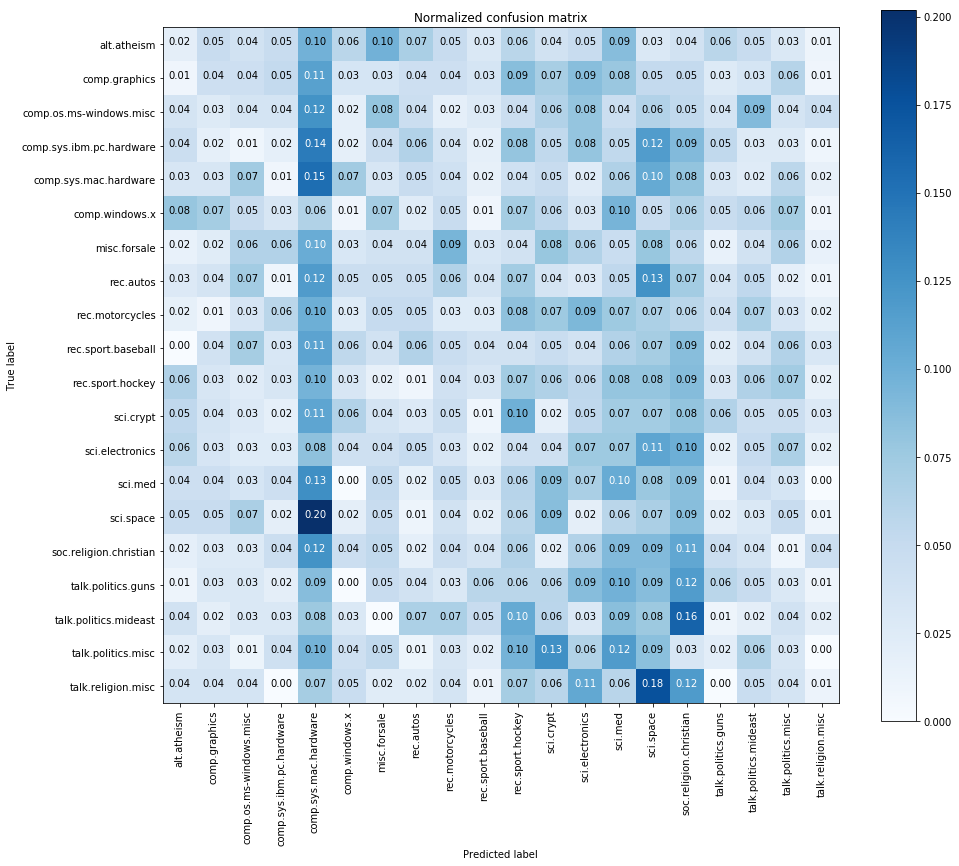

In [74]:
fig = plt.figure()
fig.set_size_inches(14, 12, forward=True)
fig.align_labels()

plot_confusion_matrix(cnf_matrix, classes=np.asarray(label_names), normalize=True,
                      title='Normalized confusion matrix')